# 1D CNN for Classification

Using the "Gas sensors for home activity monitoring" data set.

## Import TensorFlow

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

## Import Data

In [2]:
import pandas as pd

column_names = ['ID', 'Time', 'R1', 'R2', 'R3', 'R4', 
                'R5', 'R6', 'R7', 'R8', 'Temp', 'Humidity']
raw_dataset = pd.DataFrame()
raw_dataset = pd.read_csv('data/HT_Sensor_dataset.dat', 
                          header = 0,
                          names = column_names, na_values = '?', 
                          low_memory = False,
                          nrows = 30000,
                          dtype = {'ID': 'int32',
                                  'Time': 'float32',
                                  'R1': 'float32',
                                  'R2': 'float32',
                                  'R3': 'float32',
                                  'R4': 'float32',
                                  'R5': 'float32',
                                  'R6': 'float32',
                                  'R7': 'float32',
                                  'R8': 'float32',
                                  'Temp': 'float32',
                                  'Humidity': 'float32'},
                          delim_whitespace = True)

In [3]:
raw_dataset.head()

,ID,Time,R1,R2,R3,R4,R5,R6,R7,R8,Temp,Humidity
0,0,-0.999750,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.225700,59.052799
1,0,-0.999472,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.230801,59.029900
2,0,-0.999194,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.236500,59.009300
3,0,-0.998916,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.241600,58.990501
4,0,-0.998627,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.246201,58.973598


In [4]:
raw_dataset.describe()

,ID,Time,R1,R2,R3,R4,R5,R6,R7,R8,Temp,Humidity
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.848533,0.475342,12.469567,9.299170,8.911931,10.133964,12.130597,13.333030,5.938533,6.637043,26.132849,57.165806
std,0.824589,0.915621,1.035233,1.694079,2.266535,2.262227,2.824418,2.685395,1.574243,1.551644,0.402714,1.355275
min,0.000000,-0.999890,7.565330,3.164680,2.439400,3.412490,6.565710,5.607280,2.762010,3.277030,25.320999,54.332600
25%,0.000000,-0.287086,12.089725,8.133080,7.797438,8.886928,10.502800,12.741625,4.962277,5.796792,25.860600,56.079676
50%,1.000000,0.414637,12.979950,10.161750,10.186550,11.408200,12.611550,13.716300,6.149335,6.915665,26.116050,56.940399
75%,2.000000,1.115377,13.158600,10.576000,10.634300,11.897200,13.449625,14.407600,7.216140,7.798650,26.439351,58.181301
max,2.000000,2.634728,13.379200,10.873000,10.964100,12.248600,23.571501,20.028299,8.368440,9.065690,27.021000,60.732601


## Preprocessing 

In [5]:
# One-hot-encode ID column
raw_dataset['ID'] = tf.keras.utils.to_categorical(raw_dataset['ID'])

In [6]:
# Check for NA's
raw_dataset.isna().sum()

ID          0
Time        0
R1          0
R2          0
R3          0
R4          0
R5          0
R6          0
R7          0
R8          0
Temp        0
Humidity    0
dtype: int64

In [7]:
# Split into train and test
total_train = raw_dataset.sample(frac = 0.8, random_state = 0)
total_valid = raw_dataset.drop(total_train.index)
print(total_train.shape[0])
print(total_valid.shape[0])

24000
6000


In [8]:
# Split ID to predict ID
y_train = total_train.pop("ID")
y_valid = total_valid.pop("ID")
X_train = total_train.copy()
X_valid = total_valid.copy()

In [9]:
# Normalize
X_train = tf.keras.utils.normalize(X_train, axis = -1, order = 2)
X_valid = tf.keras.utils.normalize(X_valid, axis = -1, order = 2)

In [10]:
X_train.head()

,Time,R1,R2,R3,R4,R5,R6,R7,R8,Temp,Humidity
8225,0.019819,0.177589,0.114686,0.113870,0.128584,0.120343,0.202932,0.083457,0.094644,0.394057,0.835792
10794,0.029955,0.181495,0.122775,0.123484,0.139158,0.133440,0.208910,0.092865,0.103722,0.383570,0.829770
9163,0.023609,0.173873,0.110474,0.110829,0.125065,0.112133,0.198624,0.089492,0.100655,0.394100,0.838809
26591,0.005686,0.153682,0.083817,0.061962,0.083275,0.123821,0.121774,0.050043,0.061696,0.410927,0.867881
6631,0.013477,0.158099,0.090893,0.088108,0.102694,0.120471,0.153982,0.071228,0.083423,0.402120,0.858076


In [11]:
X_train.describe()

,Time,R1,R2,R3,R4,R5,R6,R7,R8,Temp,Humidity
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,0.006918,0.179542,0.133432,0.127582,0.145210,0.174280,0.191405,0.085138,0.095215,0.377240,0.824684
std,0.013132,0.011418,0.021828,0.030338,0.029814,0.038076,0.035555,0.021058,0.020470,0.013758,0.021369
min,-0.014415,0.119674,0.050082,0.038612,0.053993,0.093948,0.088630,0.042820,0.050202,0.352541,0.790640
25%,-0.004099,0.175425,0.119352,0.112110,0.127530,0.149529,0.181922,0.071335,0.083331,0.365693,0.808180
50%,0.006085,0.182317,0.144027,0.144250,0.161488,0.182413,0.197556,0.086916,0.097486,0.374392,0.816814
75%,0.016012,0.188028,0.148875,0.149571,0.167360,0.192857,0.205687,0.102990,0.111310,0.387703,0.841177
max,0.037821,0.193214,0.158479,0.159544,0.178263,0.328449,0.286005,0.115586,0.126022,0.415724,0.879554


In [12]:
y_train.head()

8225     1.0
10794    1.0
9163     1.0
26591    0.0
6631     1.0
Name: ID, dtype: float32

In [13]:
X_train = X_train.to_numpy()
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
print(X_train.shape[0])
X_valid = X_valid.to_numpy()
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)
print(X_valid.shape[0])

24000
6000


## Build Model

In [14]:
def build_model():
    # Convolutional base
    model = models.Sequential([
        layers.Conv1D(filters = 32, kernel_size = 3, activation = 'relu', 
                      input_shape = (X_train.shape[1], 1)),
        layers.Conv1D(filters = 32, kernel_size = 3, activation = 'relu'),
        layers.Dropout(0.5),
        layers.MaxPooling1D(pool_size = 2),
        layers.Flatten(),
        layers.Dense(32, activation = 'relu'),
        layers.Dense(3)     
    ])
    
    model.compile(optimizer = "adam",
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])
    
    return model

In [15]:
model = build_model()

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 9, 32)             128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7, 32)             3104      
_________________________________________________________________
dropout (Dropout)            (None, 7, 32)             0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 96)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                3104      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

## Train 

In [17]:
EPOCHS = 10

early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                              mode = 'min', 
                                              patience = 10,
                                              verbose = 1)

history = model.fit(X_train, 
                    y_train, 
                    epochs = EPOCHS, 
                    callbacks = [early_stop, tfdocs.modeling.EpochDots()],
                    validation_data = (X_valid, y_valid))

Epoch 1/10
746/750 [============================>.] - ETA: 0s - loss: 0.6509 - accuracy: 0.6278
Epoch: 0, accuracy:0.6288,  loss:0.6498,  val_accuracy:0.8173,  val_loss:0.4659,  
750/750 [==============================] - 8s 10ms/step - loss: 0.6498 - accuracy: 0.6288 - val_loss: 0.4659 - val_accuracy: 0.8173
Epoch 2/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3187 - accuracy: 0.8532 - val_loss: 0.2231 - val_accuracy: 0.9398
Epoch 3/10
750/750 [==============================] - 10s 13ms/step - loss: 0.1982 - accuracy: 0.9136 - val_loss: 0.1375 - val_accuracy: 0.9575
Epoch 4/10
750/750 [==============================] - 9s 12ms/step - loss: 0.1134 - accuracy: 0.9607 - val_loss: 0.0823 - val_accuracy: 0.9740
Epoch 5/10
750/750 [==============================] - 7s 10ms/step - loss: 0.0663 - accuracy: 0.9808 - val_loss: 0.0432 - val_accuracy: 0.9977
Epoch 6/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0437 - accuracy: 0.9895 - val_loss: 0.023

188/188 - 1s - loss: 0.0177 - accuracy: 0.9980


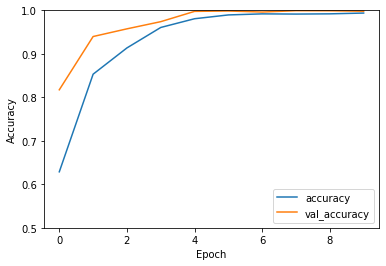

In [18]:
# Compare with validation set

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')

test_loss, test_acc = model.evaluate(X_valid, y_valid, verbose = 2)